# Used Car In The United States America

##### Overview
The goal of this project is to develop a predictive model for estimating the prices of used cars in the USA. We will be using a dataset containing information on 762,091 used cars scraped from cars.com. The data was collected in April 2023, ensuring its relevance and accuracy.

By analyzing the various attributes of the used cars, such as make, model, year, mileage, fuel type, and more, we aim to understand the factors that influence the pricing. Our objective is to build a robust machine learning model that can accurately predict the price of a used car based on these attributes.

Throughout the project, we will employ data analysis techniques, including data cleaning, feature engineering, and exploratory data analysis (EDA). This will help us uncover patterns, relationships, and key features that significantly impact the price of used cars.

Once the data is prepared, we will train and evaluate our predictive model using machine learning algorithms such as regression models. We will split the dataset into training and testing sets to assess the model's performance. Our goal is to create a reliable model that can provide accurate price estimates for used cars.

It's important to note that the dataset covers a specific duration, limited to April 2023, and that the used car market is influenced by various factors beyond the dataset's scope, such as economic conditions and technological advancements. Therefore, the model's predictions should be interpreted within the context of the specific timeframe.

By the end of this project, we aim to provide valuable insights and a predictive model that can assist both buyers and sellers in making informed decisions regarding used car prices.

##### Project Goals
Used car price pridiction in USA

###### Prerequisites

# Project Requirements

In [1]:
# Tools to visualse data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Download file
cars_data_usa = pd.read_csv('cars.csv') # This data was collected on Apr, 2023. Geo USA

In [3]:
# The size of data '762,091 instances' and '20 columuns'.
data_size_usa = cars_data_usa.shape
print(data_size_usa)

(762091, 20)


In [4]:
cars_data_usa[:100]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acura,ZDX Base,2010,97400.0,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,All-wheel Drive,Gasoline,NaN,Gray,Gray,NaN,NaN,NaN,NaN,NaN,4.7,14.0,NaN,16500.0
96,Acura,ZDX Base,2012,0.0,3.7L V6 24V MPFI SOHC,6-Speed Automatic,All-wheel Drive,Gasoline,16-23,Crystal Black Pearl,Ebony,0.0,0.0,1.0,Genesis of Downers Grove,NaN,4.7,4.0,NaN,22490.0
97,Acura,ILX 2.0L,2014,134399.0,2.0L I4 16V MPFI SOHC,5-Speed Automatic,Front-wheel Drive,Gasoline,24-35,Black,Ebony,0.0,0.0,1.0,United Auto Sales,NaN,4.7,32.0,NaN,13995.0
98,Acura,ILX Premium Package,2019,40948.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Performance Red Pearl,Ebony,0.0,0.0,1.0,Off Lease Only Miami,5.0,4.7,26.0,400.0,21399.0


In [5]:
unique_mpg_original = cars_data_usa['mpg'].unique()
print(unique_mpg_original)

['39-38' nan '19-24' '21-22' '17-24' '21-0' '22-22' '0-0' '18-24' '16-23'
 '24-35' '24-34' '25-35' '25-36' '22-31' '35-35' '0-34' '25-0' '24-0'
 '27-28' '24-33' '27-34' '25-34' '25-31' '27-33' '24-30' '24-31' '23-31'
 '27-31' '18-25' '18-26' '26-27' '28-32' '28-29' '29-36' '26-36' '30-37'
 '25-29' '20-31' '20-29' '20-30' '20-0' '17-25' '19-28' '26-26' '19-29'
 '20-28' '18-0' '17-26' '19-26' '18-27' '18-29' '25-25' '20-26' '20-25'
 '27-27' '19-27' '21-27' '22-28' '21-26' '17-22' '22-27' '19-23' '19-22'
 '21' '19-0' '28-28' '17-0' '24-24' '21-29' '21-30' '22-30' '31-31'
 '22-31.0' '21-31' '23-33' '21-34' '23-32' '20-32' '19-25' '23' '34-34'
 '23-0' '20-34' '16-24' '16-22' '16-21' '20-27' '15-20' '21-21' '17-23'
 '17-21' '16-0' '17-20' '18-23' '15-21' '13-18' '14-22' '13-20' '14-23'
 '13-19' '12-19' '13-21' '13-22' '14-25' '12-20' '13-0' '11-20' '16-20'
 '14-19' '14-20' '18-22' '16-28' '14-21' '15-22' '21-28' '18-28' '15-23'
 '18-20' '22-29' '26-35' '28-36' '27-36' '30-42' '25-33' '29-38'

In [6]:
print(cars_data_usa.dtypes)

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object


In [7]:
cars_data_usa.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [8]:
# Detect the variables which is not completed.
# Variable : cars_data_usa
# manufacturer                0
# model                       0
# year                        0
# mileage                   506
# engine                  15050
# transmission             9904
# drivetrain              21562
# fuel_type               22927
# mpg                    142071
# exterior_color           8859
# interior_color          56975
# accidents_or_damage     24212
# one_owner               31483
# personal_use_only       24852
# seller_name              8593
# seller_rating          213973
# driver_rating           31632
# driver_reviews_num          0
# price_drop             351979
# price                       0
# dtype: int64


# Clean the data
cars_data_usa_cleaned = cars_data_usa.dropna()
print(cars_data_usa_cleaned.isnull().sum(axis=0)) 


# The size of car_data_usa afetr cleaned
# cars_data_usa_cleaned_size = cars_data_usa_cleaned.shape
# print(cars_data_usa_cleaned_size) # (243500, 20)

manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64


In [9]:
# screening unnecessary columns.
# columns_to_drop = ['seller_name']
# cars_data_usa_cleaned = cars_data_usa_cleaned.drop(columns_to_drop, axis=1)

In [10]:
# Check the output
cars_data_usa_cleaned.shape

(243500, 20)

In [11]:
cars_data_usa_cleaned[:100]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
5,Acura,ILX Hybrid 1.5L,2013,62042.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,Ebony,0.0,0.0,1.0,Kalidy Kia,2.2,4.4,12.0,109.0,18000.0
13,Acura,NSX T,2001,28734.0,3.2L V6 24V MPFI DOHC,6-Speed Manual,Rear-wheel Drive,Gasoline,17-24,Silver,Black,0.0,0.0,1.0,Vantage Auto The Collection,3.5,4.1,1.0,7650.0,169500.0
14,Acura,NSX Base,2017,15904.0,Twin Turbo Gas/Electric V-6 3.5 L/213,Automatic,All-wheel Drive,Hybrid,21-22,130R White,Ebony,0.0,0.0,1.0,Piazza Acura / Honda of Reading,4.7,4.8,17.0,2111.0,139876.0
15,Acura,NSX T,1998,82602.0,3.2L V6 24V MPFI DOHC,6-Speed Manual,Rear-wheel Drive,Gasoline,17-24,Formula Red,Tan,0.0,0.0,1.0,Diamond Motorworks,4.5,4.9,1.0,1000.0,124800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Acura,ILX Premium & A-SPEC Packages,2019,37028.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Platinum White Pearl,Red,0.0,1.0,1.0,Joe Bullard Acura,5.0,4.7,26.0,660.0,28000.0
362,Acura,ILX Base,2019,45085.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Gray,Ebony,0.0,1.0,1.0,CarVision of Maple Shade,4.7,4.7,26.0,1000.0,19999.0
363,Acura,ILX Premium Package,2019,23101.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Lunar Silver Metallic,Ebony,0.0,0.0,1.0,Hopkins Acura,3.2,4.7,26.0,867.0,25929.0
370,Acura,ILX Base,2018,56729.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,25-35,Crystal Black Pearl,Ebony,1.0,0.0,1.0,HGreg.com Doral,4.8,4.6,20.0,500.0,17498.0


In [12]:
num_unique_models = cars_data_usa_cleaned['price_drop'].nunique()

print(num_unique_models)

5183


In [13]:
cars_data_usa_cleaned['car_age'] = 2024 - cars_data_usa_cleaned['year']

/var/folders/t5/xxcnz_z93wd122r6j3z6vzw00000gn/T/ipykernel_20350/2478810806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data_usa_cleaned['car_age'] = 2024 - cars_data_usa_cleaned['year']


In [14]:
cars_data_usa_cleaned['present_price'] = cars_data_usa_cleaned['price'] - cars_data_usa_cleaned['price_drop']

/var/folders/t5/xxcnz_z93wd122r6j3z6vzw00000gn/T/ipykernel_20350/660906506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data_usa_cleaned['present_price'] = cars_data_usa_cleaned['price'] - cars_data_usa_cleaned['price_drop']


In [15]:
# mpg to Average mpg
mpg_values = cars_data_usa_cleaned['mpg'].astype(str)
split_mpg = mpg_values.str.split('-', expand=True)
min_mpg = pd.to_numeric(split_mpg[0], errors='coerce')
max_mpg = pd.to_numeric(split_mpg[1], errors='coerce')
average_mpg = (min_mpg + max_mpg) / 2
cars_data_usa_cleaned['mpg'] = average_mpg


/var/folders/t5/xxcnz_z93wd122r6j3z6vzw00000gn/T/ipykernel_20350/1359034082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data_usa_cleaned['mpg'] = average_mpg


/var/folders/t5/xxcnz_z93wd122r6j3z6vzw00000gn/T/ipykernel_20350/4192107561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data_usa_cleaned['mpg'] = pd.to_numeric(cars_data_usa_cleaned['mpg'], errors='coerce')


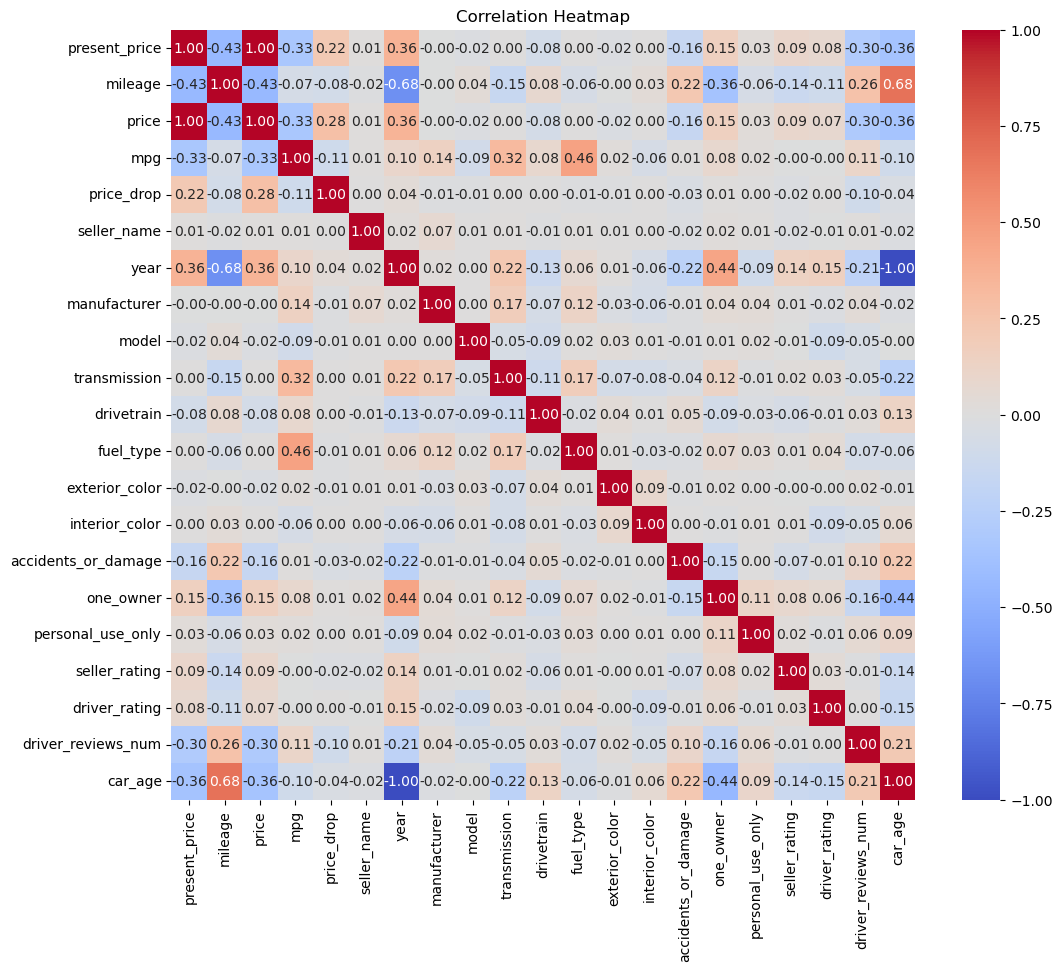

In [16]:
# Convert 'mpg' column to numeric
cars_data_usa_cleaned['mpg'] = pd.to_numeric(cars_data_usa_cleaned['mpg'], errors='coerce')


# Select the numerical and categorical variables for correlation analysis
numerical_variables = ['present_price','mileage', 'price', 'mpg', 'price_drop']
categorical_variables = ['seller_name', 'year', 'manufacturer', 'model', 'transmission', 'drivetrain', 'fuel_type', 'exterior_color', 'interior_color',
                         'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'car_age']

# Encode the categorical variables
label_encoder = LabelEncoder()
encoded_categorical = cars_data_usa_cleaned[categorical_variables].apply(label_encoder.fit_transform)

# Concatenate the numerical and encoded categorical variables
encoded_data = pd.concat([cars_data_usa_cleaned[numerical_variables], encoded_categorical], axis=1)

# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

plt.figure(figsize=(12,10))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [17]:
encoded_data

,present_price,mileage,price,mpg,price_drop,seller_name,year,manufacturer,model,transmission,...,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,car_age
2,16500.0,53422.0,17000.0,38.5,500.0,8211,25,0,2542,180,...,7,311,836,0,1,1,33,21,11,10
5,17891.0,62042.0,18000.0,38.5,109.0,4107,25,0,2542,180,...,7,2815,836,0,0,1,12,21,11,10
13,161850.0,28734.0,169500.0,20.5,7650.0,7968,13,0,3227,76,...,4,3314,158,0,0,1,25,18,0,22
14,137765.0,15904.0,139876.0,21.5,2111.0,6184,29,0,3225,173,...,7,25,836,0,0,1,37,25,16,6
15,123800.0,82602.0,124800.0,20.5,1000.0,2263,10,0,3227,76,...,4,1440,1901,0,0,1,35,26,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762081,34300.0,12337.0,34600.0,26.5,300.0,8106,32,28,4421,113,...,4,1462,498,0,1,0,37,26,23,3
762084,30250.0,33319.0,30500.0,26.5,250.0,3426,31,28,4421,113,...,4,332,498,1,1,1,39,26,26,4
762085,29775.0,26781.0,30883.0,28.5,1108.0,3952,32,28,4407,113,...,4,1016,1409,1,1,1,40,26,23,3
762086,34548.0,22877.0,34798.0,29.0,250.0,8096,34,28,4397,113,...,4,555,367,0,1,0,32,19,1,1


In [18]:
# Summry Statistic 
encoded_data.describe()

,present_price,mileage,price,mpg,price_drop,seller_name,year,manufacturer,model,transmission,...,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,car_age
count,2.435000e+05,243500.000000,2.435000e+05,242584.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,...,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000
mean,2.977062e+04,52170.196103,3.068007e+04,25.019001,909.457343,4138.410407,30.427113,14.073228,2843.430185,106.680879,...,4.036123,2004.606049,650.507786,0.237220,0.588809,0.692201,31.949043,23.565170,90.986078,4.572887
std,1.866235e+04,37393.822339,1.894283e+04,6.052001,1135.918978,2468.490128,3.230613,8.219965,1626.566756,56.487442,...,0.673758,1218.337750,566.189606,0.425379,0.492051,0.461584,7.729196,2.389141,91.277227,3.230613
min,-2.056000e+03,0.000000,5.000000e+02,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.959900e+04,24790.000000,2.039200e+04,21.000000,330.000000,1966.000000,29.000000,8.000000,1419.000000,45.000000,...,4.000000,942.000000,158.000000,0.000000,0.000000,0.000000,29.000000,23.000000,20.000000,2.000000
50%,2.671900e+04,43421.000000,2.750000e+04,24.500000,561.000000,4111.000000,31.000000,14.000000,2716.000000,113.000000,...,4.000000,1898.000000,498.000000,0.000000,1.000000,1.000000,35.000000,24.000000,60.000000,4.000000
75%,3.589000e+04,70831.500000,3.686800e+04,28.500000,1000.000000,6276.250000,33.000000,22.000000,4313.000000,173.000000,...,4.000000,3052.000000,1030.000000,0.000000,1.000000,1.000000,37.000000,25.000000,136.000000,6.000000
max,1.869999e+06,938032.000000,1.899999e+06,94.500000,79909.000000,8450.000000,35.000000,28.000000,5679.000000,254.000000,...,9.000000,4171.000000,2114.000000,1.000000,1.000000,1.000000,40.000000,27.000000,367.000000,35.000000


In [19]:
lowest_price_car = cars_data_usa_cleaned.loc[cars_data_usa_cleaned['price'].idxmin()]
lowest_price_car_manufacturer = lowest_price_car['manufacturer']
lowest_price_car_model = lowest_price_car['model']
lowest_price = lowest_price_car['price']
print("The car with the lowest price is: Manufacturer -", lowest_price_car_manufacturer, ", Model -", lowest_price_car_model, ", Price -", lowest_price)


The car with the lowest price is: Manufacturer - Nissan , Model - Maxima SE , Price - 500.0


In [20]:
print(encoded_data.isnull().sum(axis=0)) 

present_price            0
mileage                  0
price                    0
mpg                    916
price_drop               0
seller_name              0
year                     0
manufacturer             0
model                    0
transmission             0
drivetrain               0
fuel_type                0
exterior_color           0
interior_color           0
accidents_or_damage      0
one_owner                0
personal_use_only        0
seller_rating            0
driver_rating            0
driver_reviews_num       0
car_age                  0
dtype: int64


In [21]:
unique_mpg = cars_data_usa_cleaned['mpg'].unique()
print(unique_mpg)

[38.5  20.5  21.5  19.5  29.   30.   26.5  29.5  30.5  28.5  32.5  33.5
 31.   24.5  25.5  25.   21.   22.   23.5  24.   23.     nan 10.5  26.
 22.5  27.5  28.   27.   20.    9.   18.5  19.    8.5  15.5  18.   16.5
 16.   17.   17.5   6.5   9.5  32.   31.5  37.   36.   12.   77.5  77.
 10.   94.5  11.    0.   14.   15.    7.5  14.5  11.5  35.    8.   13.5
  7.   12.5  13.   34.   34.5  35.5  33.   42.5  37.5  36.5  39.   39.5
 40.   39.4  38.   42.   40.5   6.   47.5  47.   48.   52.   41.5  50.
 45.5  44.   58.   54.5  55.   59.   55.5  41.   43.   50.5  76.   18.25
  5.5  48.5  43.5  73.5  54.   40.75 52.5  49.5  46.5  49.   53.5  45.  ]


In [22]:
# Average sell


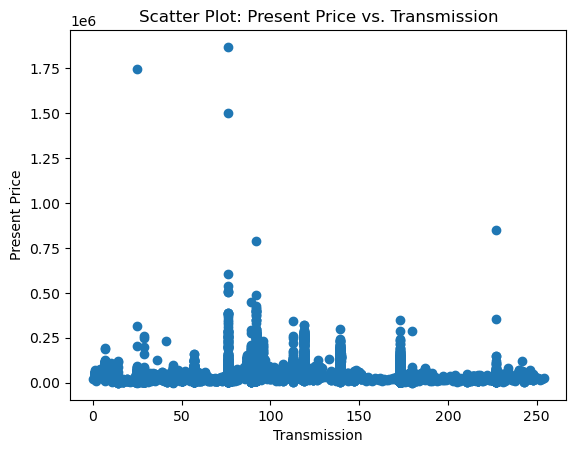

In [23]:
# y_present_price vs x_transmission
x_transmission = encoded_data['transmission']
y_present_price = encoded_data['present_price']

# Plotting the scatter plot
plt.scatter(x_transmission, y_present_price)
plt.xlabel('Transmission')
plt.ylabel('Present Price')
plt.title('Scatter Plot: Present Price vs. Transmission')
plt.show()


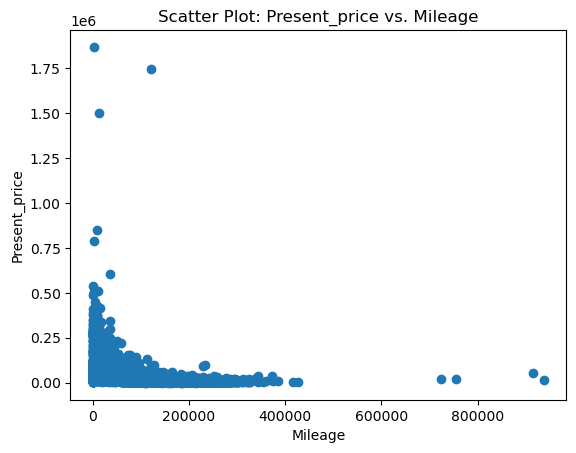

In [24]:
# y_present_price vs x_transmission
x_mielage = encoded_data['mileage']
y_present_price = encoded_data['present_price']

# Plotting the scatter plot
plt.scatter(x_mielage, y_present_price)
plt.xlabel('Mileage')
plt.ylabel('Present_price')
plt.title('Scatter Plot: Present_price vs. Mileage')
plt.show()

In [25]:
unique_fuel_types = cars_data_usa_cleaned['fuel_type'].unique()
print(unique_fuel_types)

['Hybrid' 'Gasoline' 'Gasoline/Mild Electric Hybrid' 'Diesel'
 'E85 Flex Fuel' 'Flexible Fuel' 'Compressed Natural Gas' 'Gasoline Fuel'
 'Hydrogen Fuel Cell' 'Plug-In Hybrid']


In [26]:
unique_manufacturer = cars_data_usa_cleaned['manufacturer'].unique()
print(unique_manufacturer)

['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'GMC' 'Honda' 'Hyundai' 'INFINITI' 'Jaguar' 'Jeep' 'Kia'
 'Land Rover' 'Lexus' 'Lincoln' 'Mazda' 'Mercedes-Benz' 'Mitsubishi'
 'Nissan' 'Porsche' 'RAM' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']


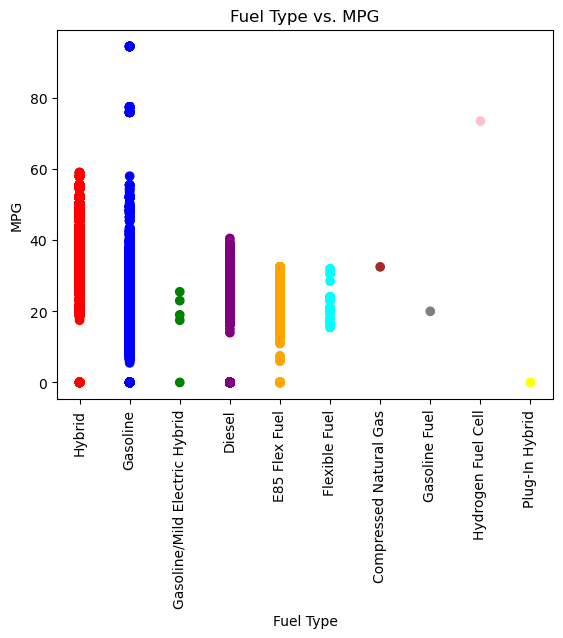

In [27]:
fuel_type = cars_data_usa_cleaned['fuel_type']
mpg = encoded_data['mpg']

# Define colors for each fuel type
fuel_type_colors = {
    'Hybrid': 'red',
    'Gasoline': 'blue',
    'Gasoline/Mild Electric Hybrid': 'green',
    'Diesel': 'purple',
    'E85 Flex Fuel': 'orange',
    'Flexible Fuel': 'cyan',
    'Compressed Natural Gas': 'brown',
    'Gasoline Fuel': 'gray',
    'Hydrogen Fuel Cell': 'pink',
    'Plug-In Hybrid': 'yellow'
}

# Create a list of colors for each data point based on fuel type
colors = [fuel_type_colors.get(fuel, 'black') for fuel in fuel_type]

# Create scatter plot with different colors for each fuel type
plt.scatter(fuel_type, mpg, color=colors)

# Customize plot
plt.title('Fuel Type vs. MPG')
plt.xlabel('Fuel Type')
plt.ylabel('MPG')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display plot
plt.show()


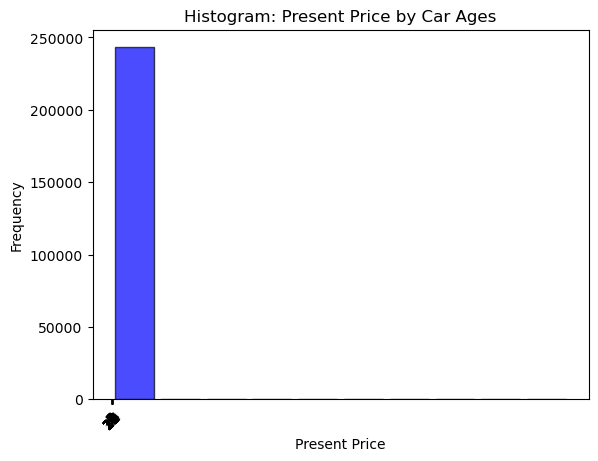

In [28]:
x_car_ages = encoded_data['car_age']
y_present_price = encoded_data['present_price']

# Plotting the histogram
plt.hist(y_present_price, bins=10, edgecolor='black', alpha=0.7, rwidth=0.85, color='blue')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.title('Histogram: Present Price by Car Ages')
plt.xticks(rotation=45)

# Add x_car_ages as x-axis labels
plt.xticks(range(len(x_car_ages.unique())), sorted(x_car_ages.unique()))

plt.show()


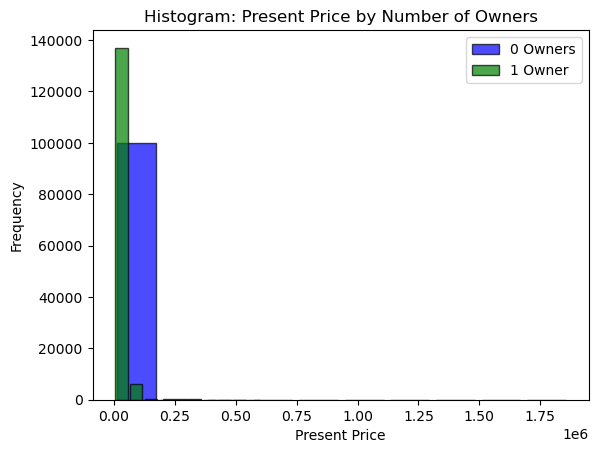

In [29]:
x_one_owner = encoded_data['one_owner']
y_present_price = encoded_data['present_price']

# Filter the present price based on the number of owners
price_0_owners = y_present_price[x_one_owner == 0]
price_1_owners = y_present_price[x_one_owner == 1]

# Plotting the histograms
plt.hist(price_0_owners, bins=10, edgecolor='black', alpha=0.7, rwidth=0.85, color='blue', label='0 Owners')
plt.hist(price_1_owners, bins=10, edgecolor='black', alpha=0.7, rwidth=0.85, color='green', label='1 Owner')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.title('Histogram: Present Price by Number of Owners')
plt.legend()
plt.show()


In [30]:
encoded_data['manufacturer'].count()

243500

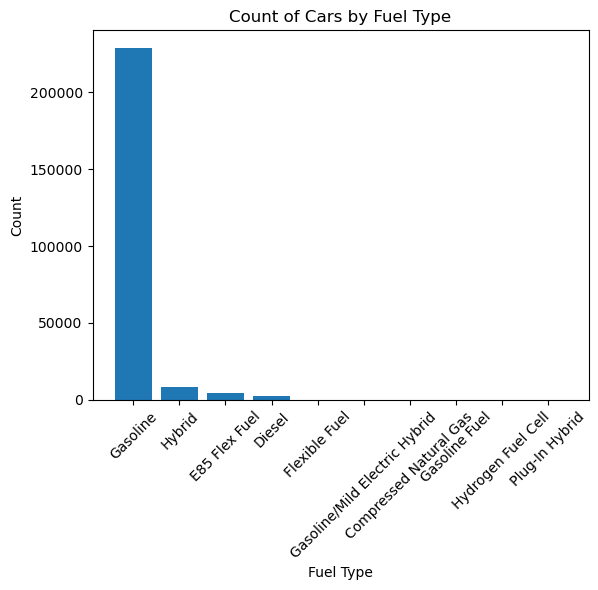

In [35]:
fuel_types = cars_data_usa_cleaned['fuel_type']
fuel_type_counts = fuel_types.value_counts()
plt.bar(fuel_type_counts.index, fuel_type_counts.values)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Cars by Fuel Type')
plt.xticks(rotation=45)
plt.show()


- Numerical Variables:

mileage (float64)
mpg (object)
price_drop (float64)
price (float64)

- Categorical Variables:
driver_reviews_num (float64)
seller_rating (float64)
driver_rating (float64)
one_owner (float64)
personal_use_only (float64)
accidents_or_damage (float64)
year (int64)
manufacturer (object)
model (object)
engine (object)
transmission (object)
drivetrain (object)
fuel_type (object)
exterior_color (object)
interior_color (object)
seller_name (object)

manufacturer	model engine	transmission	drivetrain	fuel_type exterior_color	interior_color seller_name 

# Todo
- ~~carriclutae the car age (2023 - year)~~
- ~~carriculate used car parice present_price = (price - price_drop)~~
- price_drop per year price_drop/ car_age
-~~See which manufacture appears in our data~~
- What can I tell by '.describe()'-summry statistics-?

- ~~scatter plot~~

  ~~y_present_price vs x_transmission~~
  
  ~~y_milage x_present_price~~

- Histogram
  y_present_price vs x_fuel_type
  
  y_present_price vs x_car_ages

  How many owner?
  y_present_price vs x_one_owner(0, 1)
  
  
 - Y count of cars x fuel type
 

Histograms:
- Histograms are used to visualize the distribution of a single variable or a single continuous numerical variable.
- They show the frequency or count of data points falling into different bins or intervals along the x-axis.
- Histograms are particularly useful for examining the shape, central tendency, and spread of a dataset, as well as identifying outliers and understanding the overall distribution of the data.
- Histograms are often used to analyze variables such as age, income, temperature, etc.

Scatter plots:
- Scatter plots are used to visualize the relationship or correlation between two numerical variables.
- They show the individual data points as dots on a Cartesian plane, with one variable represented on the x-axis and the other on the y-axis.
- Scatter plots are particularly useful for identifying patterns, trends, or associations between variables, such as positive or negative correlations, clusters, outliers, or nonlinear relationships.
- Scatter plots are often used to analyze variables such as height and weight, temperature and humidity, GDP and population, etc.

In summary, use a histogram when you want to understand the distribution of a single variable, and use a scatter plot when you want to examine the relationship between two variables.

# Work overview

1. ~~**Data Collection:** Obtain the dataset containing information on 762,091 used cars from cars.com. The dataset includes attributes such as make, model, year, mileage, fuel type, and more. Ensure the dataset is in a suitable format for analysis.~~

2. **Data Cleaning and Preprocessing:** Perform data cleaning tasks, including handling missing values, removing duplicates, and addressing any data quality issues. Convert data types as needed and ensure consistency in data representation.

3. **Exploratory Data Analysis (EDA):** Conduct EDA to gain insights into the dataset. Explore the distribution of variables, identify outliers, and visualize relationships between variables using appropriate charts and graphs. Investigate patterns, trends, and correlations in the data.

4. **Feature Engineering:** Create new features or transform existing ones to enhance the predictive power of the model. Extract relevant information from the available attributes, such as extracting the car's age from the year feature or calculating the average mileage per year.

5. **Model Selection and Training:** Select appropriate machine learning algorithms for the regression task of predicting used car prices. Split the dataset into training and testing sets. Train the chosen models on the training data and evaluate their performance using suitable evaluation metrics.

6. **Model Evaluation and Fine-Tuning:** Assess the performance of the trained models on the testing set. Compare and analyze the results to select the best-performing model. Fine-tune the selected model by adjusting hyperparameters or applying regularization techniques to improve its performance.

7. **Model Interpretation and Insights:** Interpret the coefficients or feature importances of the trained model to understand the factors that significantly influence used car prices. Extract insights and draw conclusions from the model's predictions.

8. **Presentation and Reporting:** Summarize the findings, insights, and model performance in a clear and concise manner. Create visualizations, charts, and tables to effectively communicate the results. Provide recommendations based on the analysis to stakeholders or potential users of the model.

9. **Documentation and Code Cleanup:** Document the entire project, including the data sources, methodologies, and key decisions made during the analysis. Clean up the code, add comments for clarity, and ensure the notebook is well-organized and easily understandable by others.

---

Feel free to customize and expand upon this work overview to fit the specific steps and details of your project. The goal is to provide a high-level overview of the tasks and workflow involved in your project, giving readers a clear understanding of the process you followed.

# Reference

1. Used Cars Dataset https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset?resource=download